***
<b> Author:</b> Raghavendra Tapas
    
<b> Updated on:</b> May 2021
    
<b> Context:</b> Machine Learning Model on Heart Disease Prediction!

Feel free to reach out to me on __[Twitter](https://twitter.com/raghutapas12)__ for any corrections or additional updates!
***

# Heart Disease Prediction

This notebook demonstrates solving a typical machine learning problem by taking an example.

<b>Steps:

1. Data Pre-Processing
2. Choosing the right estimator/algorithm for the problem.
3. Fit the model/algorithm and use it to make predictions on our data.
4. Evaluating model.
5. Improve a model.
6. Save and load a trained model.
7. Post-Processing Dashboards.

## Dependencies or Libraries

Importing the NumPy, Pandas and scikit learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Pre-Processing

<b>Data source:</b> a small subset of huge dataset from `https://archive.ics.uci.edu/ml/datasets/Heart+Disease`

In [3]:
# importing data from local storage
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Choosing the Model

In [3]:
# import the model choosing decision tree
from IPython import display
display.Image(url="https://scikit-learn.org/stable/_static/ml_map.png",width=900)

A Decision tree on Choosing the Machine Learning Model:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

<b>Model:</b> Random Forest Classifier. 

Since the given problem is a classification problem (Has Heart Disease or not)


In [7]:
# Step 1: Data Samples above 50?
# Answer: Yes

print(f"Data Samples present in the dataset = {len(heart_disease)}")

Data Samples present in the dataset = 303


<b>Step 2:</b> Are we trying to predict a categorical data?

Answer: `Yes`

We are trying to predict a target variable named 'target' variable which is a categorical data (0 or 1 or i.e. Heart Disease or No Heart Disease).

<b>Step 3:</b> Do we have labeled data?

Answer: `Yes`

<b>Step 4:</b> Do we have 100k+ samples?

Answer: `Yes`

Solution 1: Use `Linear SVC` : https://scikit-learn.org/stable/modules/svm.html#classification

### Linear SVC

* Import LinearSVC estimator class
* Setup random seeding = 1
* Create Feature Matrix (x)
* Create Labels (y)
* Split the data
* Instantiate LinearSVC
* Fit the model
* Evaluate LinearSVC

In [6]:
from sklearn.svm import LinearSVC
np.random.seed(1)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = LinearSVC()
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"Linear SVC Model Accuracy: {(accuracy * 100).round(2)} %")

Linear SVC Model Accuracy: 49.18 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


* Observation: The SVC Model is not accurate enough.
* More importantly our model is a binary classification problem (0 or 1)
* Structured Data: Ensemble methods
* Unstructured data: Image, audio, etc.. use deep learning or transfer learning

### K-Nearest Neighbour (NearestCentroid)

If the Linear SVC does not work, go for the `K-Nearest neighbour`

* Import K-Nearest estimator class (NearestCentroid)
* Setup random seeding = 2
* Create Feature Matrix (x)
* Create Labels (y)
* Split the data
* Instantiate NearestCentroid
* Fit the model
* Evaluate NearestCentroid

In [6]:


from sklearn.neighbors import NearestCentroid
np.random.seed(2)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = NearestCentroid()
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"K-Nearest neighbour (Nearest centroid) Model Accuracy: {(accuracy * 100).round(2)} %")



K-Nearest neighbour (Nearest centroid) Model Accuracy: 67.21 %


### Random Forest Classifier

We will be checking if K-Nearest is the Optimum Model by evaluating accuracy of random forest classifier.

Random Forest is a `low bias` and `high variance` model. But the majority vote reduces the variance of the model.

* Import RandomForestClassifier class
* Setup random seeding = 3
* Create Feature Matrix (x)
* Create Labels (y)
* Split the data
* Instantiate RandomForestClassifier
* Fit the model
* Evaluate RandomForestClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier  
np.random.seed(3)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)
clf.score(x_test, y_test)
accuracy = clf.score(x_test, y_test)
print(f"Random Forest Classifier Accuracy = {(accuracy * 100).round(2)} %")

Random Forest Classifier Accuracy = 83.61 %


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        21
           1       0.88      0.88      0.88        40

    accuracy                           0.84        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.84      0.84      0.84        61



In [9]:
confusion_matrix(y_test, y_preds)

array([[16,  5],
       [ 5, 35]], dtype=int64)

In [10]:
accuracy = accuracy_score(y_test, y_preds)
print(f"Random Forest Classifier Accuracy: {(accuracy * 100).round(2)} %")

Random Forest Classifier Accuracy: 83.61 %


## Improving model

In [11]:
# Tweaking n_estimators
np.random.seed(1)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model Accuracy on Test Set: {clf.score(x_test, y_test)* 100}")
    print("")

Trying model with 10 estimators...
Model Accuracy on Test Set: 81.9672131147541

Trying model with 20 estimators...
Model Accuracy on Test Set: 78.68852459016394

Trying model with 30 estimators...
Model Accuracy on Test Set: 86.88524590163934

Trying model with 40 estimators...
Model Accuracy on Test Set: 83.60655737704919

Trying model with 50 estimators...
Model Accuracy on Test Set: 83.60655737704919

Trying model with 60 estimators...
Model Accuracy on Test Set: 90.1639344262295

Trying model with 70 estimators...
Model Accuracy on Test Set: 85.24590163934425

Trying model with 80 estimators...
Model Accuracy on Test Set: 85.24590163934425

Trying model with 90 estimators...
Model Accuracy on Test Set: 85.24590163934425



* Observation: It seems that ~60 estimators has best accuracy. 
* Note that since the data is randomized, the observation may change.

## Save the model and load it

In [12]:
import pickle
pickle.dump(clf, open("../prediction-models/heartDiseasePredictionModel2.pkl", "wb"))

In [13]:
loaded_model = pickle.load(open("../prediction-models/heartDiseasePredictionModel2.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8524590163934426

## Make Predictions

Two methods:
 1. predict()
 2. predict_proba()
    

In [14]:
# The Truth array
np.array(y_test)

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [15]:
# Our Final Prediction array
clf.predict(x_test)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
# Compare predictions to truth labels to evaluate the model

y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [17]:
# Predict accuracy using scikit learn
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [18]:
# predict_proba() method
# This method returns probabilities of a classification label

clf.predict_proba(x_test[:5])

array([[0.51111111, 0.48888889],
       [0.04444444, 0.95555556],
       [0.21111111, 0.78888889],
       [0.11111111, 0.88888889],
       [0.25555556, 0.74444444]])

In [19]:
clf.predict(x_test[:5])

array([0, 1, 1, 1, 1], dtype=int64)

`predict()` can be used for regression models too.

## Evaluating Machine Learning Methods

<b>Reference: </b> [Scikit Learn Metrics Documentation](https://scikit-learn.org/stable/modules/model_evaluation.html/ "Metrics and scoring")

- <b>Estimator score method:</b> Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve.

- <b>Scoring parameter:</b> Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.

- <b>Metric functions:</b> The sklearn.metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.

### Scoring Parameters - Cross Validation

In [20]:
# Method 1: Default score method
clf.score(x_test, y_test)

0.8524590163934426

In [21]:
from IPython import display
display.Image(url="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png",width=500)

`Cross Validation:` also known as 'k-fold cross-validation' is a process of re-sampling or shuffling the test data.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. 

<b> General Process:</b> 

* Shuffle the dataset randomly.
* Split the dataset into k groups
* For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
* Summarize the skill of the model using the sample of model evaluation scores

In [22]:
# import cross validation score from scikit learn
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x, y, cv = 5)

array([0.81967213, 0.90163934, 0.7704918 , 0.8       , 0.75      ])

In [23]:
np.random.seed(1)

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv = 5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8149726775956283)

In [24]:
# Default scoring parameter of classifier = mean accuracy
clf.score(x_test, y_test)



0.8524590163934426

In [25]:
# Scoring parameter set to None by default
cross_val_score = cross_val_score(clf, x, y, cv = 5, scoring = None)
cross_val_score

array([0.81967213, 0.90163934, 0.7704918 , 0.8       , 0.75      ])

### Accuracy

In [26]:
# Taking the mean of cross-validation scores
accuracy = np.mean(cross_val_score)
print(f"Cross-Validation Random Forest Classifier Accuracy = {(accuracy * 100).round(2)} %")

Cross-Validation Random Forest Classifier Accuracy = 80.84 %


### ROC Curve

* **ROC** - Receiver Operating Characteristic Curve
* **AUC** - Area under the ROC Curve

ROC curve is a comparison of a model's true positive rate (TPR) vs. model's false positive rate (FPR).

* True Positive: Model predicts 1 when the truth is 1. Model predicts 0 when the truth is 0.
* False Positive: Model predicts 0 when the truth is 1. Model predicts 1 when the truth is 0.

In [27]:
# Split the dataset
x_test, x_test, y_train, y_train = train_test_split(x, y, test_size = 0.2)

In [28]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

# y_probs returns an array of numbers that follow the following format
# Probability that the prediction is 0 = P(0)
# Probability that the prediction is 1 = P(1)
# array in the form: [[P(0), P(1)]

y_probs[:5]


array([[0.03333333, 0.96666667],
       [0.17777778, 0.82222222],
       [0.32222222, 0.67777778],
       [0.35555556, 0.64444444],
       [0.26666667, 0.73333333]])

In [29]:
len(y_probs)

61

In [30]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.96666667, 0.82222222, 0.67777778, 0.64444444, 0.73333333])

In [31]:
# Calculate FPR, TPR and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr.round(2)

array([0.  , 0.05, 0.05, 0.1 , 0.19, 0.29, 0.33, 0.33, 0.38, 0.43, 0.43,
       0.48, 0.48, 0.52, 0.52, 0.62, 0.62, 0.67, 0.76, 0.76, 0.86, 0.9 ,
       0.9 , 1.  , 1.  , 1.  , 1.  , 1.  ])

Import the Matplot Library as shown in [Dependencies or Libraries used](#Dependencies-or-Libraries-used)

* Calculating `AUC`
* Creating a function for plotting `ROC Curve`

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.3744047619047619

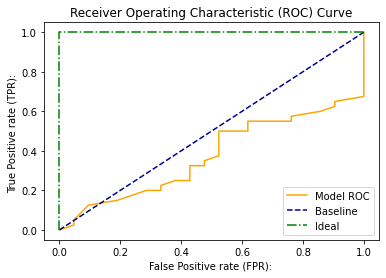

In [33]:
def plot_roc(fpr, tpr):
    """
    Plots a ROC Curve given the false positive rate (FPR) 
    and True positive rate (TPR)
    """
    
    # Plot ROC
    plt.plot(fpr, tpr, color="orange", label="Model ROC")
    
    # Plot Line with no predictive power (Guessing Game or baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "Baseline")
    
    #Plot Perfect/ideal ROC. To get this, we feed test to the model. Model already knows the test, so predictions will be perfect.
    fpr, tpr, thresholds = roc_curve(y_test, y_test)
    plt.plot(fpr, tpr, color="green", linestyle = "-.", label = "Ideal")
    
    # Customize the plot
    plt.xlabel("False Positive rate (FPR): ")
    plt.ylabel("True Positive rate (TPR): ")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc(fpr,tpr)

### Confusion Matrix

Comparing labels the model predicts to the actual labels it was supposed to predict.

An idea of where the model is getting confused.

In [34]:
from sklearn.metrics import confusion_matrix
ypreds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[15,  6],
       [ 3, 37]], dtype=int64)

In [35]:
# Visualization of confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames = ["Actual Labels"], colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,15,6
1,3,37


In [36]:
total = 15 + 6 + 3 + 37
total

61

In [37]:
len(x_test)

61

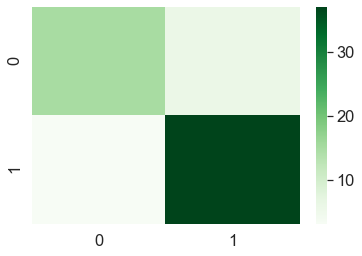

In [38]:
# Heatmap of the Confusion Matrix using Seaborn's heatmap()
import seaborn as sns

# set font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat, cmap="Greens");

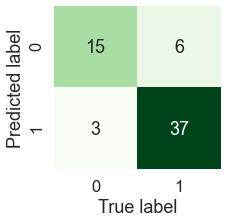

In [39]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar = False, cmap="Greens")
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
plot_conf_mat(conf_mat)

In [40]:
# or simply use inbuilt confusion matrix plot built into the scikit learn
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(clf, y_test, y_preds, cmap='Greens');

# does not work as of scikit 0.24.2

### Classification Report

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.86      0.93      0.89        40

    accuracy                           0.85        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.85      0.85        61



To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [47]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Importing the Boston House Price dataset from the scikit library
from sklearn.datasets import load_boston
boston = load_boston()

# Getting data set into Pandas Data Frame
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

# Create the feature matrix and label
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train);

In [49]:
# Return the coefficient of determination :math:`R^2` of the prediction.
model.score(x_test, y_test)

0.8654448653350507